In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import re
import glob

path = glob.glob("C:\\Python\\Data analysis\\Infant Feeding and Social Media Sentiment Analysis\\archive\\*")
print(path)

['C:\\Python\\Data analysis\\Infant Feeding and Social Media Sentiment Analysis\\archive\\Breastfeeding_3months.xlsx', 'C:\\Python\\Data analysis\\Infant Feeding and Social Media Sentiment Analysis\\archive\\Breastfeeding_3months_.csv', 'C:\\Python\\Data analysis\\Infant Feeding and Social Media Sentiment Analysis\\archive\\FormulaMilk_3months.xlsx', 'C:\\Python\\Data analysis\\Infant Feeding and Social Media Sentiment Analysis\\archive\\FormulaMilk_3months_.csv', 'C:\\Python\\Data analysis\\Infant Feeding and Social Media Sentiment Analysis\\archive\\Infant Feeding and Social Media Sentiment Analysis.ipynb']


In [102]:
df=pd.read_csv("C:\\Python\\Data analysis\\Infant Feeding and Social Media Sentiment Analysis\\archive\\Breastfeeding_3months_.csv")

df.head()

C:\Users\blaze\AppData\Local\Temp\ipykernel_21700\2876968072.py:1: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



status_id               created_at  \
0  1538941385809747968  2022-06-20 17:46:33 UTC   
1  1538941854649032705  2022-06-20 17:48:24 UTC   
2  1538942219645861892  2022-06-20 17:49:51 UTC   
3  1538942452723335169  2022-06-20 17:50:47 UTC   
4  1538942645011030016  2022-06-20 17:51:33 UTC   

                                                text  display_text_width  \
0  Manic Mondays ☕\n\nFrom the 16th century onwar...                 140   
1  southern softie commented on MailOnline: What ...                 196   
2  MomToBe Women’s Rayon Maternity Dress/Easy Bre...                 163   
3  @AlfredMwandagha Good for a breastfeeding bunn...                  33   
4  We know more about cow’s milk than human milk....                 140   

  country     day  
0     NaN  Monday  
1     NaN  Monday  
2     NaN  Monday  
3     NaN  Monday  
4     NaN  Monday

Quick data lookup

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238045 entries, 0 to 238044
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   status_id           238045 non-null  int64 
 1   created_at          238045 non-null  object
 2   text                228058 non-null  object
 3   display_text_width  238045 non-null  int64 
 4   country             485 non-null     object
 5   day                 238045 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.9+ MB


Noted that the column "created_at" is datetime information column with data type "object". For further analysis, we will transform the data type later.

In [104]:
df.isna().sum()

status_id                  0
created_at                 0
text                    9987
display_text_width         0
country               237560
day                        0
dtype: int64

Data preprocessing

In [105]:
df["created_at"]=pd.to_datetime(df["created_at"])

df.head()

status_id                created_at  \
0  1538941385809747968 2022-06-20 17:46:33+00:00   
1  1538941854649032705 2022-06-20 17:48:24+00:00   
2  1538942219645861892 2022-06-20 17:49:51+00:00   
3  1538942452723335169 2022-06-20 17:50:47+00:00   
4  1538942645011030016 2022-06-20 17:51:33+00:00   

                                                text  display_text_width  \
0  Manic Mondays ☕\n\nFrom the 16th century onwar...                 140   
1  southern softie commented on MailOnline: What ...                 196   
2  MomToBe Women’s Rayon Maternity Dress/Easy Bre...                 163   
3  @AlfredMwandagha Good for a breastfeeding bunn...                  33   
4  We know more about cow’s milk than human milk....                 140   

  country     day  
0     NaN  Monday  
1     NaN  Monday  
2     NaN  Monday  
3     NaN  Monday  
4     NaN  Monday

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238045 entries, 0 to 238044
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   status_id           238045 non-null  int64              
 1   created_at          238045 non-null  datetime64[ns, UTC]
 2   text                228058 non-null  object             
 3   display_text_width  238045 non-null  int64              
 4   country             485 non-null     object             
 5   day                 238045 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 10.9+ MB


Text preprocessing for future use

In [107]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\blaze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
stopwords = stopwords.words('english')

stopwords.extend(['\xa0', '&gt', 'MailOnline', 'Click&amp', 'amp', 'RT', '2m', 'Ppl', 'gt', 'Much', 'much', 'Yet', 'yet', 'Become', 'become', 'Next', 'next'])

In [109]:
def preprocess_desc(text_col):
    preprocessed_descs = []
    url_pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tag_pattern = re.compile('@(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    for sentence in tqdm(text_col.values):
        if sentence is np.nan:
            preprocessed_descs.append(sent.lower().strip())
            continue
        else:
            sent = url_pattern.sub('', sentence)
            sent = tag_pattern.sub('', sent)
            sent = sent.replace('\\r', ' ')
            sent = sent.replace('\\"', ' ')
            sent = sent.replace('\\n', ' ')
            sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
            sent = ' '.join(e for e in sent.split() if e not in stopwords)
            preprocessed_descs.append(sent.lower().strip())
    return preprocessed_descs


In [110]:
df=df.assign(pre_text=preprocess_desc(df["text"]))

100%|██████████| 238045/238045 [00:06<00:00, 38062.70it/s]


In [111]:
df.drop_duplicates(subset="pre_text", inplace=True)# Drop spamming text

In [112]:
df.head()

status_id                created_at  \
0  1538941385809747968 2022-06-20 17:46:33+00:00   
1  1538941854649032705 2022-06-20 17:48:24+00:00   
2  1538942219645861892 2022-06-20 17:49:51+00:00   
3  1538942452723335169 2022-06-20 17:50:47+00:00   
4  1538942645011030016 2022-06-20 17:51:33+00:00   

                                                text  display_text_width  \
0  Manic Mondays ☕\n\nFrom the 16th century onwar...                 140   
1  southern softie commented on MailOnline: What ...                 196   
2  MomToBe Women’s Rayon Maternity Dress/Easy Bre...                 163   
3  @AlfredMwandagha Good for a breastfeeding bunn...                  33   
4  We know more about cow’s milk than human milk....                 140   

  country     day                                           pre_text  
0     NaN  Monday  manic mondays from 16th century onwards charit...  
1     NaN  Monday  southern softie commented what concerning adul...  
2     NaN  Monday  momtobe women rayon maternity dress easy breas...  
3     NaN  Monday                           good breastfeeding bunny  
4     NaN  Monday  we know cow milk human milk but new research m...

Get countries code for graph ploting

In [113]:
df["country"].unique()

array([nan, 'United States', 'United Kingdom',
       'Republic of the Philippines', 'South Africa', 'Zimbabwe', 'India',
       'Rwanda', 'Canada', 'Ireland', 'Australia', 'Kenya', 'Vietnam',
       'Malaysia', 'East Timor', 'Denmark', 'Nigeria', 'The Netherlands',
       'Italy', 'Pakistan', 'Germany', 'Jamaica', 'Switzerland', 'Norway',
       'Singapore', 'Mexico', 'Indonesia', 'Kingdom of Saudi Arabia',
       'Ghana', 'Uganda', 'Thailand', 'Cyprus', 'Trinidad and Tobago',
       'Botswana', 'Portugal', 'Namibia', 'New Zealand',
       'Republic of Slovenia', 'Ethiopia', 'United Arab Emirates',
       'Maldives', 'Zambia', 'Dominican Republic',
       "People's Republic of China"], dtype=object)

In [114]:
import pycountry
mapping = {country.name: country.alpha_3 for country in pycountry.countries}
mapping_flag = {country.name: country.flag for country in pycountry.countries}

In [115]:
df['country'].replace(['Republic of the Philippines', 'Vietnam', 'East Timor',
       'The Netherlands', 'Kingdom of Saudi Arabia',
       'Republic of Slovenia', "People's Republic of China"], ['Philippines', 'Viet Nam', 'Timor-Leste', 'Netherlands', 'Saudi Arabia', 'Slovenia', 'China'], regex = True, inplace = True)

In [116]:
df = df.assign(country_code = None)
df = df.assign(country_flag = None)
for index in df.index:
    country=df.at[index, "country"]
    df.at[index, "country_code"]=mapping.get(country)
    df.at[index, "country_flag"]=mapping_flag.get(country)

In [117]:
df.iloc[1000:1050]

status_id                created_at  \
1766  1539325090965372928 2022-06-21 19:11:15+00:00   
1767  1539325275720364032 2022-06-21 19:11:59+00:00   
1768  1539325488845529089 2022-06-21 19:12:50+00:00   
1769  1539325493316530176 2022-06-21 19:12:51+00:00   
1770  1539325510039195648 2022-06-21 19:12:55+00:00   
1771  1539325523301498881 2022-06-21 19:12:58+00:00   
1772  1539325554393894915 2022-06-21 19:13:06+00:00   
1773  1539325569199812610 2022-06-21 19:13:09+00:00   
1774  1539325582294536192 2022-06-21 19:13:12+00:00   
1775  1539325592197382144 2022-06-21 19:13:15+00:00   
1776  1539325592868466688 2022-06-21 19:13:15+00:00   
1777  1539325603320430594 2022-06-21 19:13:17+00:00   
1778  1539325652909707265 2022-06-21 19:13:29+00:00   
1779  1539325814759739392 2022-06-21 19:14:08+00:00   
1781  1539326017801797632 2022-06-21 19:14:56+00:00   
1782  1539326311558172674 2022-06-21 19:16:06+00:00   
1783  1539326563833073664 2022-06-21 19:17:06+00:00   
1784  1539326689955786753 2022-06-21 19:17:36+00:00   
1785  1539326889109561344 2022-06-21 19:18:24+00:00   
1786  1539326982067998721 2022-06-21 19:18:46+00:00   
1788  1539327217641177088 2022-06-21 19:19:42+00:00   
1789  1539327422897610753 2022-06-21 19:20:31+00:00   
1794  1539329168646623232 2022-06-21 19:27:27+00:00   
1795  1539329294522101760 2022-06-21 19:27:57+00:00   
1797  1539329679374438401 2022-06-21 19:29:29+00:00   
1801  1539330681762979840 2022-06-21 19:33:28+00:00   
1808  1539332326999605249 2022-06-21 19:40:00+00:00   
1809  1539332521745338373 2022-06-21 19:40:47+00:00   
1810  1539332651999428612 2022-06-21 19:41:18+00:00   
1812  1539332773512720385 2022-06-21 19:41:47+00:00   
1816  1539334459459350531 2022-06-21 19:48:29+00:00   
1818  1539335023911964672 2022-06-21 19:50:43+00:00   
1819  1539335619436072960 2022-06-21 19:53:05+00:00   
1820  1539335840589139969 2022-06-21 19:53:58+00:00   
1821  1539335919408320512 2022-06-21 19:54:17+00:00   
1826  1539336496574091265 2022-06-21 19:56:34+00:00   
1828  1539336584255897601 2022-06-21 19:56:55+00:00   
1829  1539336775327416320 2022-06-21 19:57:41+00:00   
1830  1539336816347688960 2022-06-21 19:57:51+00:00   
1833  1539336927635456000 2022-06-21 19:58:17+00:00   
1836  1539337283857358848 2022-06-21 19:59:42+00:00   
1837  1539337360969633793 2022-06-21 20:00:01+00:00   
1838  1539337412354056192 2022-06-21 20:00:13+00:00   
1840  1539337668332380160 2022-06-21 20:01:14+00:00   
1844  1539338460888281096 2022-06-21 20:04:23+00:00   
1846  1539338785212735489 2022-06-21 20:05:40+00:00   
1852  1539339705149317120 2022-06-21 20:09:19+00:00   
1854  1539339860770754565 2022-06-21 20:09:57+00:00   
1855  1539339883386490881 2022-06-21 20:10:02+00:00   
1858  1539340348064993280 2022-06-21 20:11:53+00:00   

                                                   text  display_text_width  \
1766  @mamamorgann I had this same thought at first!...                 248   
1767  @bell00david OMG. "Experiments are already und...                 208   
1768  No but if you’re breastfeeding. That’s both a ...                 101   
1769  My father found rebirthing helpful for some of...                 140   
1770  I always talk to fast. Vata pacifying diet- wa...                 144   
1771  A mother’s routine doesn’t change w/o kids on ...                 144   
1772  Moms need 75% pay for half time; 20 hours max ...                 143   
1773  Fingers get calloused playing guitar; just lik...                 140   
1774  Do any of you ladies have tips for managing me...                 113   
1775  Breastfeeding on demand is sooooo time consumi...                  50   
1776  @ceotinylife @DarbyColm @WesternHSCTrust @NNAU...                 218   
1777  @amber_kelleher I think you could avert a war ...                 144   
1778  @IvankaTrump Have you studied Russian culture?...                 144   
1779  @lowerbodyinjury @yolo_pinyato like she's been...                  87   
1781  @ArieBaNegev @POTUS

In [118]:
df["country_code"].unique()

array([None, 'USA', 'GBR', 'PHL', 'ZAF', 'ZWE', 'IND', 'RWA', 'CAN',
       'IRL', 'AUS', 'KEN', 'VNM', 'MYS', 'TLS', 'DNK', 'NGA', 'NLD',
       'ITA', 'PAK', 'DEU', 'JAM', 'CHE', 'NOR', 'SGP', 'MEX', 'IDN',
       'SAU', 'GHA', 'UGA', 'THA', 'CYP', 'TTO', 'BWA', 'PRT', 'NAM',
       'NZL', 'SVN', 'ETH', 'ARE', 'MDV', 'ZMB', 'DOM', 'CHN'],
      dtype=object)

In [119]:
df["country_flag"].unique()

array([None, '🇺🇸', '🇬🇧', '🇵🇭', '🇿🇦', '🇿🇼', '🇮🇳', '🇷🇼', '🇨🇦', '🇮🇪', '🇦🇺',
       '🇰🇪', '🇻🇳', '🇲🇾', '🇹🇱', '🇩🇰', '🇳🇬', '🇳🇱', '🇮🇹', '🇵🇰', '🇩🇪', '🇯🇲',
       '🇨🇭', '🇳🇴', '🇸🇬', '🇲🇽', '🇮🇩', '🇸🇦', '🇬🇭', '🇺🇬', '🇹🇭', '🇨🇾', '🇹🇹',
       '🇧🇼', '🇵🇹', '🇳🇦', '🇳🇿', '🇸🇮', '🇪🇹', '🇦🇪', '🇲🇻', '🇿🇲', '🇩🇴', '🇨🇳'],
      dtype=object)

Data analysis

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=px.histogram(df, x="created_at")

fig.show()

Looks like there is lot of text wrote at Aug 3~ Aug 5. 

In [121]:
dfWorldMap=df.groupby(['country', 'country_code', 'country_flag']).size().reset_index(name = 'size')
dfWorldMap.sort_values(by='size', ascending=False ,inplace=True)


In [122]:
dfWorldMap.head(20)

country country_code country_flag  size
39   United States          USA           🇺🇸   188
38  United Kingdom          GBR           🇬🇧    73
15           Kenya          KEN           🇰🇪    22
31    South Africa          ZAF           🇿🇦    16
10           India          IND           🇮🇳    16
2           Canada          CAN           🇨🇦    14
12         Ireland          IRL           🇮🇪    14
22         Nigeria          NGA           🇳🇬    11
25     Philippines          PHL           🇵🇭     9
0        Australia          AUS           🇦🇺     7
28    Saudi Arabia          SAU           🇸🇦     6
40        Viet Nam          VNM           🇻🇳     5
8          Germany          DEU           🇩🇪     4
9            Ghana          GHA           🇬🇭     4
18          Mexico          MEX           🇲🇽     3
20     Netherlands          NLD           🇳🇱     3
42        Zimbabwe          ZWE           🇿🇼     3
16        Malaysia          MYS           🇲🇾     3
19         Namibia          NAM           🇳🇦     2
13           Italy          ITA           🇮🇹     2

In [123]:
fig = px.scatter_geo(dfWorldMap, locations="country_code", color="country",
                     hover_name="country", size="size",
                     projection="natural earth")
fig.show()

In [124]:
fig1=px.choropleth(dfWorldMap,
              locations="country_code",
              color='size',
              projection='kavrayskiy7',
              range_color=(0, 30),
              scope='world',
              hover_name="country",
              color_continuous_scale=px.colors.sequential.Sunset,
              
              title='Global map text posting location within 3 months')

fig1.show()

In [125]:
dfWorldMap2=df.groupby(['created_at', 'country', 'country_code', 'country_flag']).size().reset_index(name = 'size')
dfWorldMap2.sort_values(by='created_at', ascending=True ,inplace=True)
dfWorldMap2.head()

fig2=px.scatter_geo(dfWorldMap2, locations="country_code", color="country",
                     hover_name="country", size="size",
                     animation_frame= dfWorldMap2['created_at'].dt.date,
                     projection="natural earth")

fig2.show()

In [126]:
fig3=px.choropleth(dfWorldMap2,
              locations="country_code",
              color='country',
              projection='kavrayskiy7',
              range_color=(0, 30),
              scope='world',
              hover_name="country",
              animation_frame= dfWorldMap2['created_at'].dt.date,
              
              
              title='Global map posting location timelines')

fig3.show()

Popular posting day

In [127]:
daycount=df.day.value_counts()

daycount

Wednesday    13547
Tuesday      11914
Monday       11236
Thursday     11187
Saturday      9799
Sunday        8628
Friday        8481
Name: day, dtype: int64

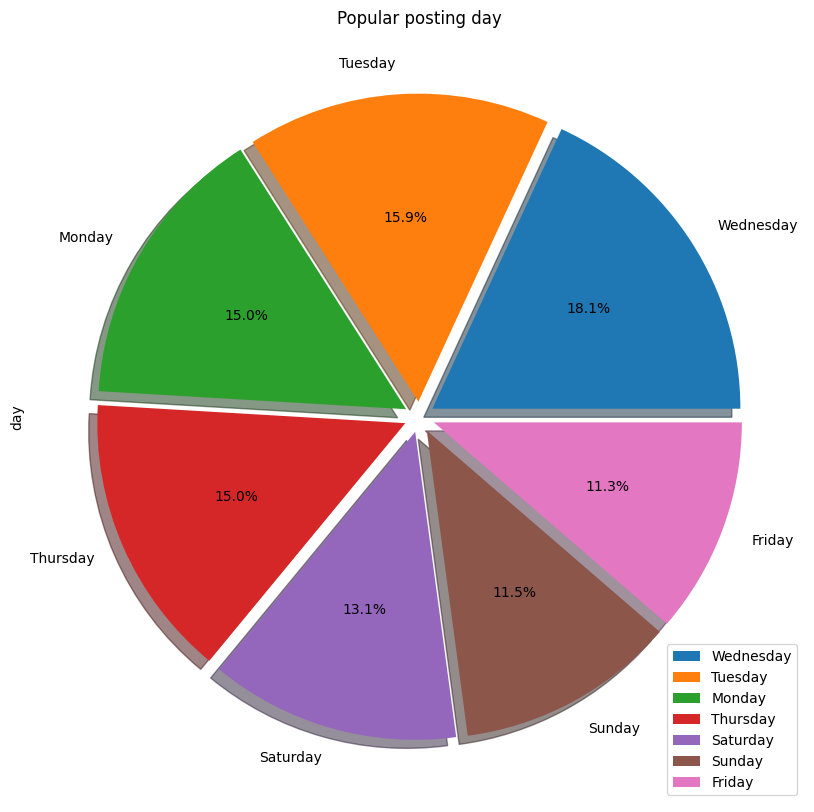

In [128]:
daycount.plot.pie(figsize=(10,10), autopct='%1.1f%%', shadow=True, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05))

plt.title("Popular posting day")
plt.legend()
plt.show()

Word cloud

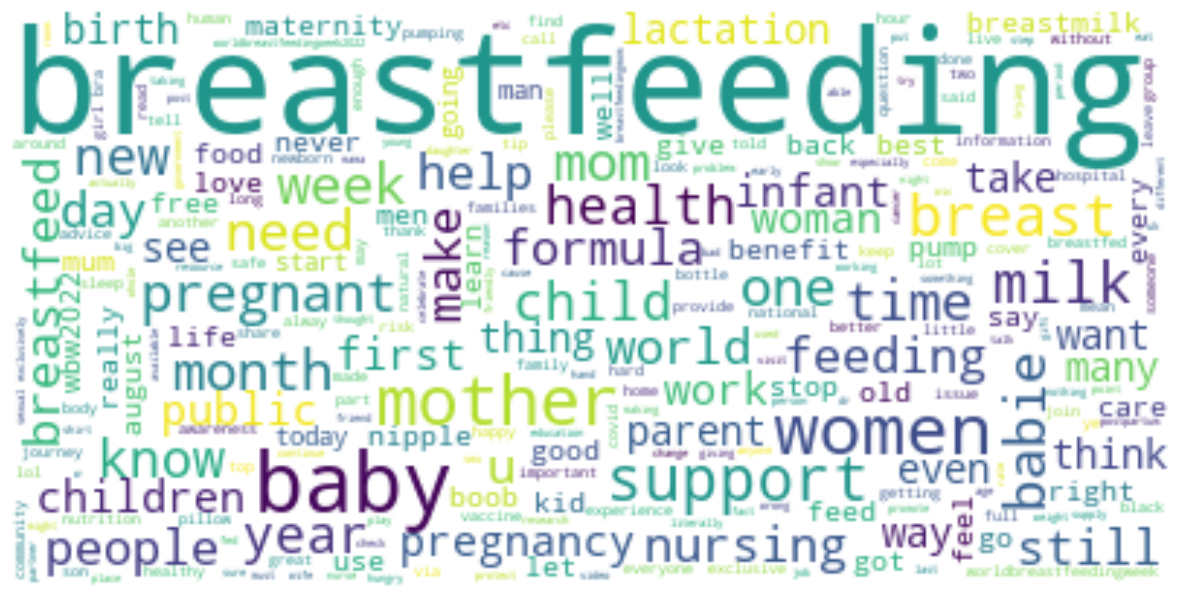

In [129]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(preText for preText in df.pre_text)

drop_words = ['2m', 'ppl', 'gt', 'much', 'yet', 'become']

stopwords = set(STOPWORDS)
stopwords = stopwords.union(drop_words)
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000, collocations = False).generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

Sentiment analysis

In [130]:
words_list=[]

for sentence in df["pre_text"]:
    all_words=sentence.split(" ")
    for word in all_words:
        words_list.append(word)

In [131]:
sentences_list = [sentence for sentence in df['pre_text']]

len(sentences_list)

74792

In [134]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [135]:
analyser = SentimentIntensityAnalyzer()

In [136]:
def getSentimentLabel(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [137]:
df=df.assign(sentiment_compound=None)
df = df.assign(sentiment_label = None)

In [138]:
for index in df.index:
    sentence=df.at[index, "pre_text"]
    polarity=analyser.polarity_scores(sentence)
    compound_score=polarity["compound"]
    df.at[index, "sentiment_compound"]= polarity["compound"]
    df.at[index, "sentiment_label"]=getSentimentLabel(compound_score)

In [139]:
df.head()

status_id                created_at  \
0  1538941385809747968 2022-06-20 17:46:33+00:00   
1  1538941854649032705 2022-06-20 17:48:24+00:00   
2  1538942219645861892 2022-06-20 17:49:51+00:00   
3  1538942452723335169 2022-06-20 17:50:47+00:00   
4  1538942645011030016 2022-06-20 17:51:33+00:00   

                                                text  display_text_width  \
0  Manic Mondays ☕\n\nFrom the 16th century onwar...                 140   
1  southern softie commented on MailOnline: What ...                 196   
2  MomToBe Women’s Rayon Maternity Dress/Easy Bre...                 163   
3  @AlfredMwandagha Good for a breastfeeding bunn...                  33   
4  We know more about cow’s milk than human milk....                 140   

  country     day                                           pre_text  \
0     NaN  Monday  manic mondays from 16th century onwards charit...   
1     NaN  Monday  southern softie commented what concerning adul...   
2     NaN  Monday  momtobe women rayon maternity dress easy breas...   
3     NaN  Monday                           good breastfeeding bunny   
4     NaN  Monday  we know cow milk human milk but new research m...   

  country_code country_flag sentiment_compound sentiment_label  
0         None         None             0.8519        Positive  
1         None         None            -0.4939        Negative  
2         None         None             0.4404        Positive  
3         None         None             0.4404        Positive  
4         None         None                0.0         Neutral

In [140]:
tf2=df["sentiment_label"].value_counts()

tf2

Positive    39132
Negative    17907
Neutral     17753
Name: sentiment_label, dtype: int64

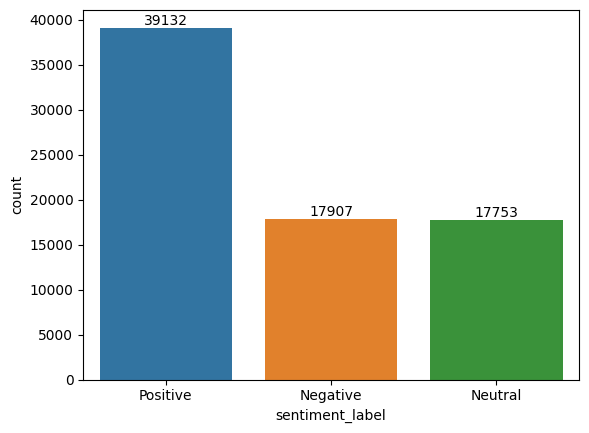

In [143]:
ax1=sns.countplot(x="sentiment_label", data=df)
ax1.bar_label(ax1.containers[0])

plt.show()

In [149]:
d=px.histogram(df, x="sentiment_compound", color="sentiment_label")

d.show()

In [150]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec,Phrases
import gensim

In [151]:
stream_text = [next_text.strip(' ').split(' ') for next_text in df['pre_text']]

w2v_model = gensim.models.Word2Vec(stream_text, min_count = 1, vector_size = 400, workers = 4, window = 3, sg = 0)

In [152]:
w2v_model.wv['pregnant'].shape

(400,)

In [155]:
def getWordAvgSentiment(word):
    dfOnlyWord=df.loc[df["pre_text"].astype(str).str.contains(word)]
    dfOnlyWord.drop_duplicates(subset = 'pre_text', inplace = True)
    return dfOnlyWord["sentiment_compound"].mean()

In [167]:
from nltk.tokenize import word_tokenize
nltk.download("all")
def getNwordDistTable(n):
    text = " ".join(preText for preText in df['pre_text'].loc[df.pre_text.notna()])
    allWords = nltk.tokenize.word_tokenize(text)

    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(['i', 'according', '50', 'the', 'this', '29', 'ppl', 'year', '2m', 'get', 'info', '25', 'also', 'need', 'new', 'like', 'one', 'u', '3'])
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)
    
    mostFreq = allWordExceptStopDist.most_common(n)
    dfFreq = pd.DataFrame(mostFreq, columns = ['word', 'size'])
    
    ## Get word average sentiment
    wAvg_list = []
    label = []
    for word in dfFreq['word']:
        avgSent = getWordAvgSentiment(word)
        wAvg_list.append(avgSent)
        label.append(getSentimentLabel(avgSent))
    dfFreq = dfFreq.assign(avg_compound = wAvg_list, sentiment_label = label)
    
    return dfFreq

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\blaze\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\blaze\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\blaze\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\blaze\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\blaze\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]   

In [168]:
def getSimWordTable(word, w2v_model):
    sim_words = w2v_model.wv.most_similar(word, topn=10)
    dfSimWords = pd.DataFrame(sim_words, columns = ['word', 'similarity'])
    
    ## Get word average sentiment
    wAvg_list = []
    label = []
    for word in dfSimWords['word']:
        avgSent = getWordAvgSentiment(word)
        wAvg_list.append(avgSent)
        label.append(getSentimentLabel(avgSent))
    dfSimWords = dfSimWords.assign(avg_compound = wAvg_list, sentiment_label = label)
    return dfSimWords

In [169]:
getSimWordTable('pregnant', w2v_model)

C:\Users\blaze\AppData\Local\Temp\ipykernel_21700\1931742623.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



word  similarity  avg_compound sentiment_label
0    vaccinated    0.884479      0.236307        Positive
1     deterring    0.789352     -0.557400        Negative
2           jab    0.787980      0.052089        Positive
3       lauding    0.784691     -0.077729        Negative
4        jabbed    0.782242      0.047550         Neutral
5       vaccine    0.778430      0.240435        Positive
6   recommended    0.762772      0.348181        Positive
7       gratlin    0.759913      0.487025        Positive
8  childbearing    0.753468      0.130298        Positive
9       periods    0.752542      0.027558         Neutral

In [170]:
dfWords = getNwordDistTable(30)
dfWords.sort_values(by='size', ascending=True ,inplace=True)
fig = px.bar(dfWords, x='size', y='word',
             hover_data=['word', 'size', 'sentiment_label'], color='avg_compound',
             labels={'avg_compound':'Word Avg Sentiment'}, width=1000 ,height=600,
             title='Most Frequency Words')
fig.show()

C:\Users\blaze\AppData\Local\Temp\ipykernel_21700\1931742623.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
dfWords.sort_values(by='size', ascending=False ,inplace=False).head(10)

word   size  avg_compound sentiment_label
0  breastfeeding  77511      0.179969        Positive
1           baby  11240      0.213056        Positive
2          women   8081      0.146853        Positive
3        support   5623      0.585012        Positive
4           milk   5282      0.233371        Positive
5         breast   4504      0.180381        Positive
6       pregnant   4273      0.128420        Positive
7        mothers   4089      0.283871        Positive
8         babies   3897      0.228558        Positive
9           week   3876      0.405156        Positive

In [172]:
dfBubble = getNwordDistTable(300)

fig = px.scatter(dfBubble, y="avg_compound", x="size",
	         size="size", color="sentiment_label",
                 hover_name="word", log_x=True)
fig.show()

C:\Users\blaze\AppData\Local\Temp\ipykernel_21700\1931742623.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [173]:
dfBubbleTopic = getSimWordTable('pregnant', w2v_model)

fig = px.scatter(dfBubbleTopic, x="avg_compound", y="similarity",
	         size="similarity", color="sentiment_label",
                 hover_name="word", log_x=False)
fig.show()

C:\Users\blaze\AppData\Local\Temp\ipykernel_21700\1931742623.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

